In [3]:
import pandas as pd
train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
#Check missing values
missing_values = train_df.isnull().sum().sort_values(ascending = False)
print("Missing Values:\n", missing_values.head(10))

Missing Values:
 PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
dtype: int64


In [5]:
# Drop columns that does not have enough values
drop_columns = ['PoolQC', 'MiscFeature','Alley', 'Fence']
train_df = train_df.drop(columns = drop_columns)
test_df = test_df.drop(columns = drop_columns)

In [6]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [7]:
# Identify category colunns fill missing values with none
cat_cols = train_df.select_dtypes(include = ['object']).columns
train_df[cat_cols] = train_df[cat_cols].fillna("None")
test_df[cat_cols] = test_df[cat_cols].fillna("None")

In [8]:
# Impute data for LotFrontage using values in neighbourhood columns
train_df["LotFrontage"] = train_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
test_df["LotFrontage"] = test_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [9]:
num_cols = train_df.select_dtypes(include=["int64", "float64"]).columns
num_cols = [col for col in num_cols if col != "SalePrice"]
for col in num_cols:
    train_df[col].fillna(train_df[col].median())
    test_df[col].fillna(test_df[col].median())

In [10]:
from sklearn.preprocessing import LabelEncoder
mapping = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "None":0}
ordinal_cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond"]
for col in ordinal_cols:
    train_df[col] = train_df[col].map(mapping)
    test_df[col] = test_df[col].map(mapping)

train_df = pd.get_dummies(train_df, drop_first = True)
test_df = pd.get_dummies(test_df, drop_first = True)

common_columns = train_df.columns.intersection(test_df.columns)
train_df = train_df[common_columns].join(train_df["SalePrice"])
test_df = test_df[common_columns]

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

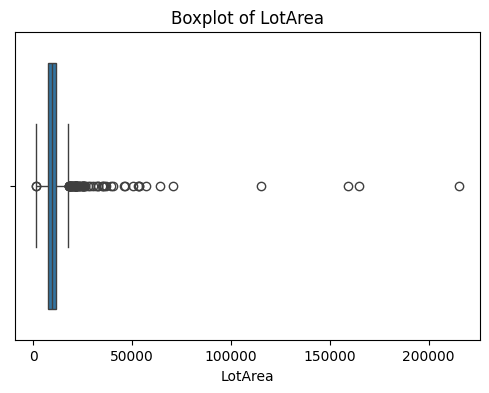

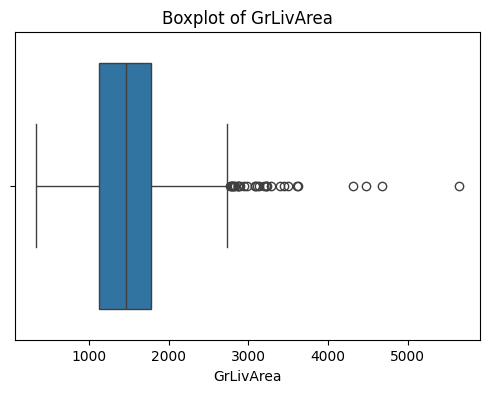

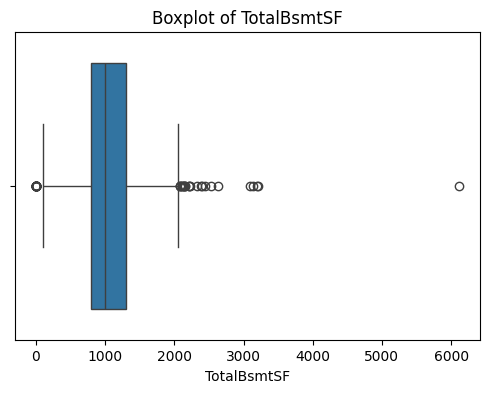

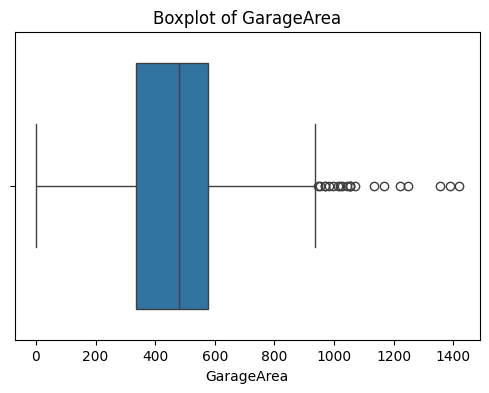

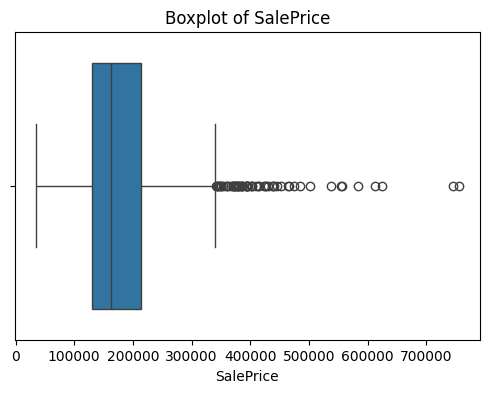

In [12]:
num_features = ["LotArea", "GrLivArea", "TotalBsmtSF", "GarageArea", "SalePrice"]
for feature in num_features:
    plt.figure(figsize = (6,4))
    sns.boxplot(x=train_df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show

In [13]:
import numpy as np
z_scores = np.abs(zscore(train_df[num_features]))
train_df = train_df[(z_scores < 3).all(axis=1)]

In [14]:
print("SalePrice in train_df:", "SalePrice" in train_df.columns)
print("SalePrice in test_df:", "SalePrice" in test_df.columns)

SalePrice in train_df: True
SalePrice in test_df: False


In [15]:
import numpy as np

skewed_features = ["LotArea", "GrLivArea", "SalePrice"]

for feature in skewed_features:
    if feature in train_df.columns:  # Only apply if feature exists in train_df
        train_df[feature] = np.log1p(train_df[feature])  

    if feature in test_df.columns:  # Only apply if feature exists in test_df
        test_df[feature] = np.log1p(test_df[feature]) 